# Handwritten Digits Dataset

In this notebook we will apply the LogitBoost algorithm to identify handwritten digits.

In [1]:
from __future__ import print_function
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="colorblind", color_codes=True)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

from logitboost import LogitBoost

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Loading the data

We use the [UCI ML handwritten digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), imported from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
This dataset contains $1797$ $8 \times 8$ examples of handwritten digits.
After shuffling the data, we split them into training and testing sets.

In [2]:
X, y = load_digits(return_X_y=True)

# Shuffle data and split it into training/testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1. / 3),
                                                    shuffle=True, stratify=y,
                                                    random_state=0)

### Digits in the training set

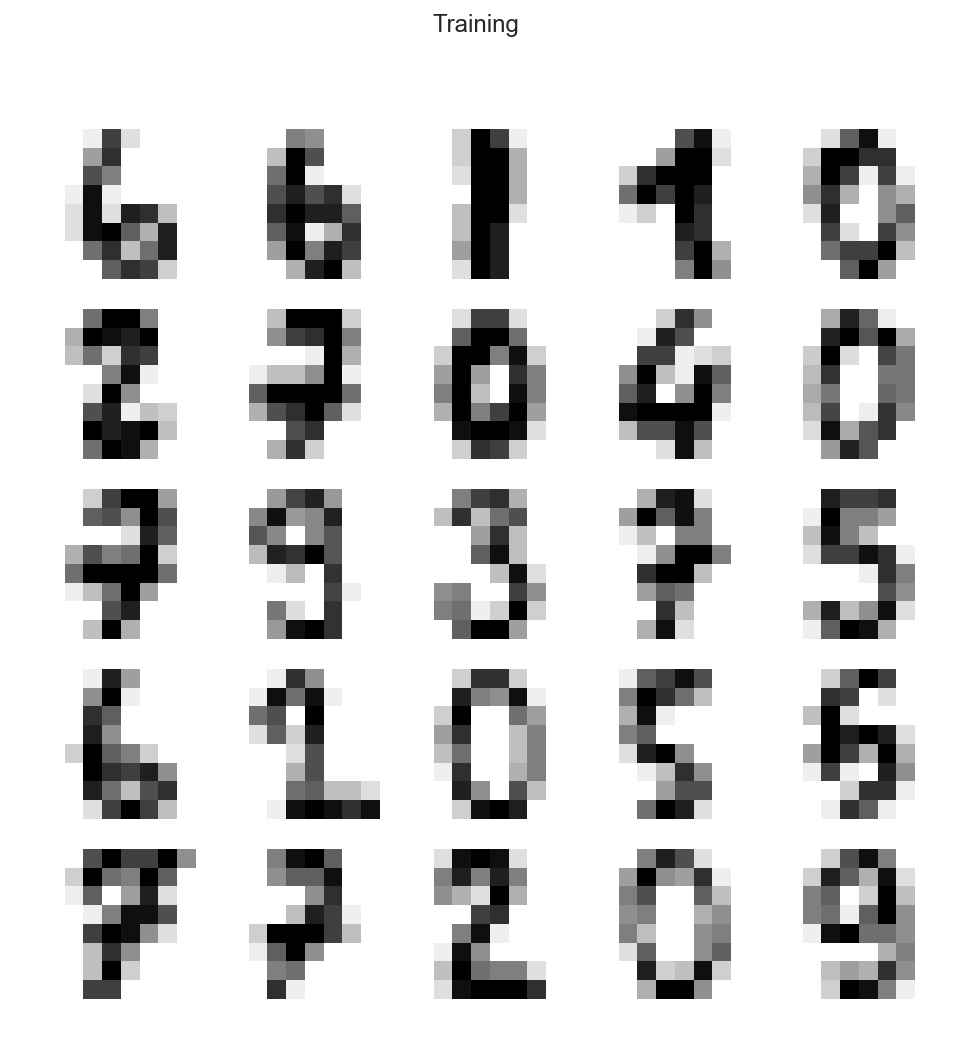

In [3]:
nrows = 5
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
k = 0
for i, j in product(range(nrows), range(ncols)):
    k = ncols * i + j
    digit = X_train[k].reshape((8, 8))
    ax[i, j].imshow(digit, cmap="binary")
    ax[i, j].axis("off")

fig.suptitle("Training")

plt.show()
plt.close()

### Digits in the testing set

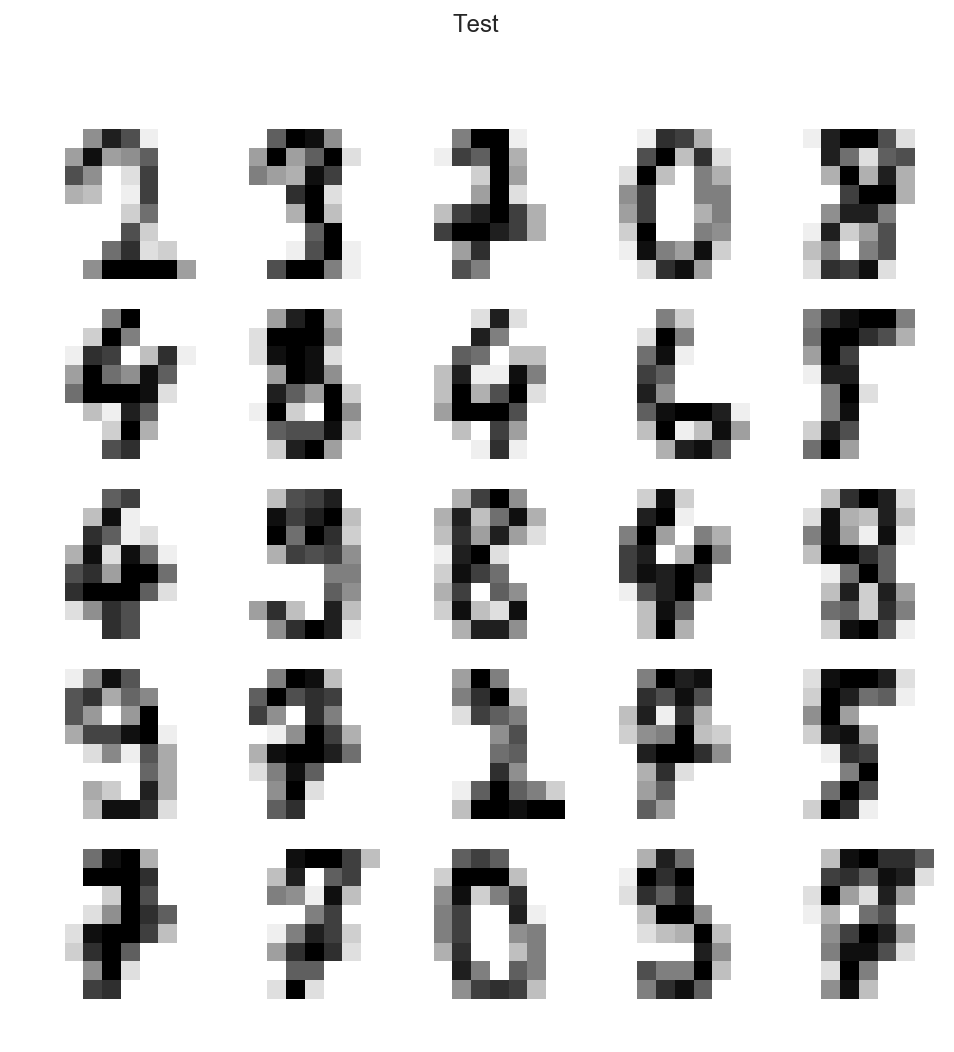

In [4]:
nrows = 5
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
k = 0
for i, j in product(range(nrows), range(ncols)):
    k = ncols * i + j
    digit = X_test[k].reshape((8, 8))
    ax[i, j].imshow(digit, cmap="binary")
    ax[i, j].axis("off")

fig.suptitle("Test")

plt.show()
plt.close()

It could be useful to visualize the relationship between the features (the $8 \times 8$ pixel grids) and the targets (the actual digits they represent).
However, since the feature data are not two-dimensional, there is no simple way to plot the feature-target pairs.
By reducing the features to 2 dimensions using [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA), we can display a scatter plot of the "lossily compressed" features and their true target values.

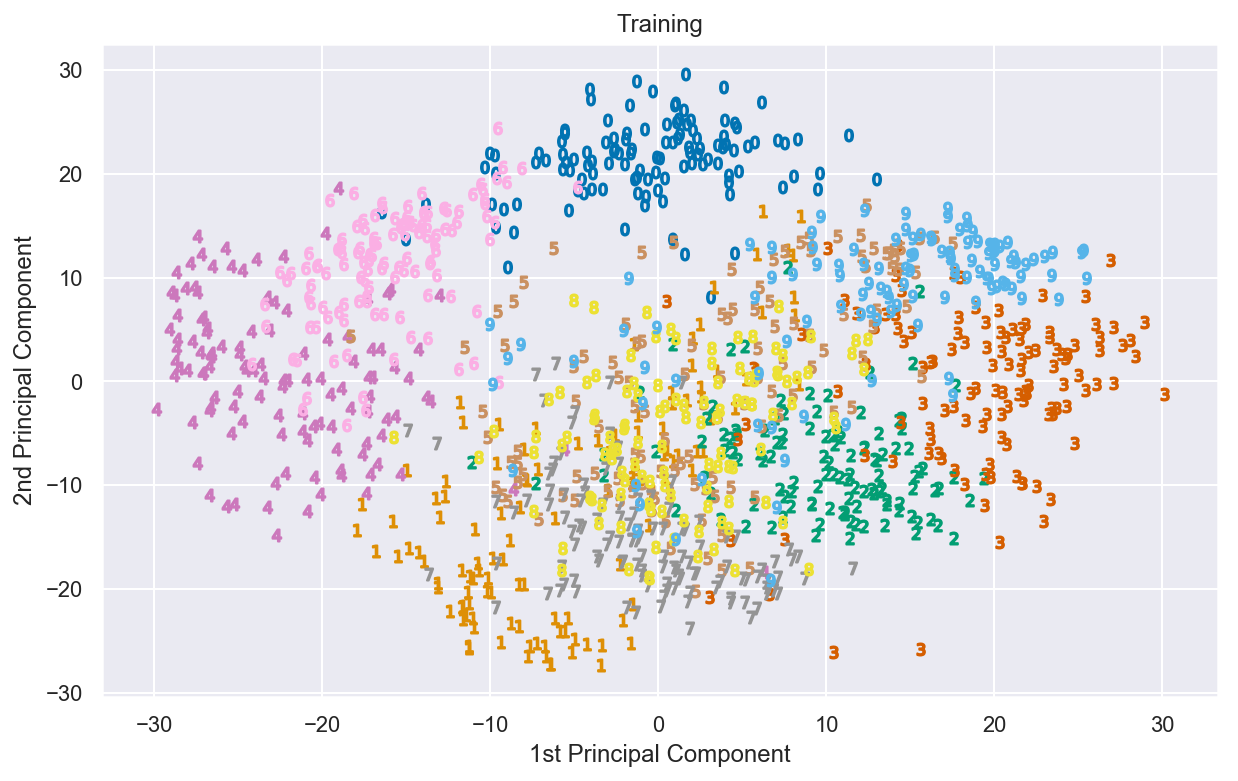

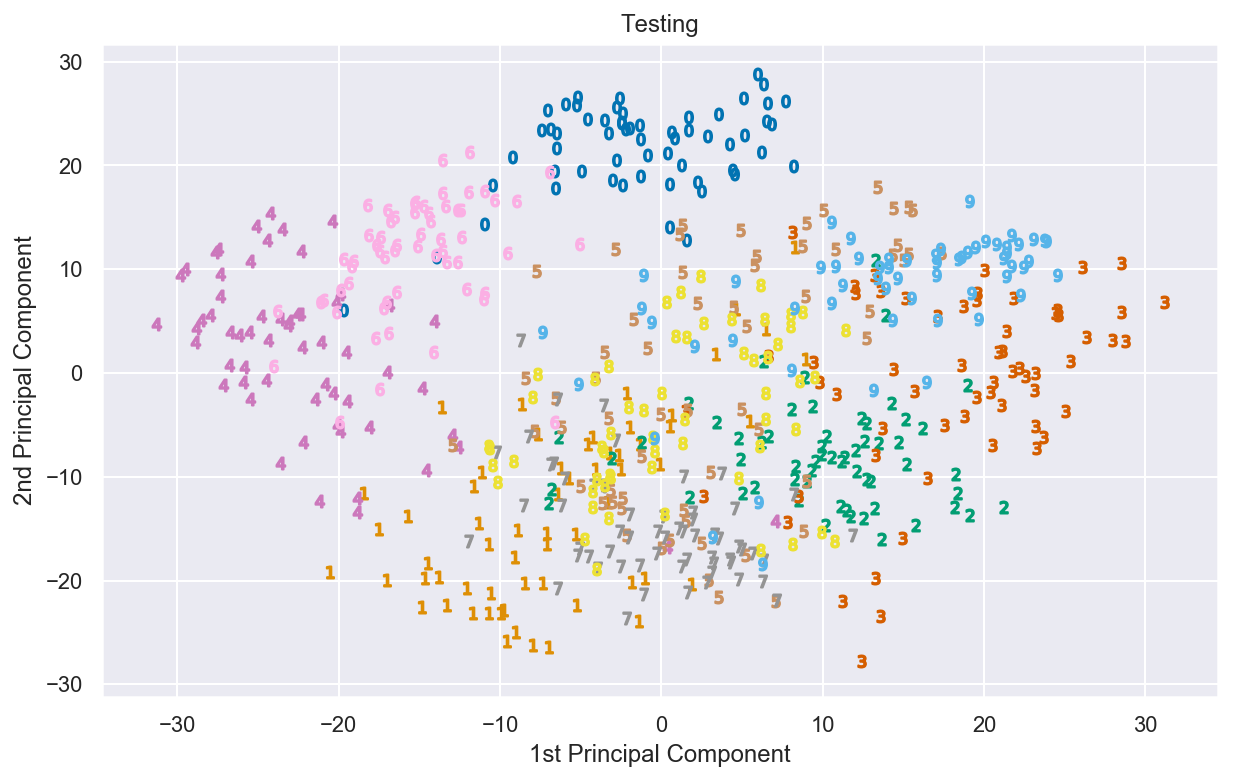

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

# Plot of the training data
plt.figure(figsize=(10, 6))
for label in range(10):
    marker = "$%d$" % label
    mask = (y_train == label)
    plt.scatter(X_train_2d[mask, 0], X_train_2d[mask, 1], marker=marker)
plt.title("Training")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.show()
plt.close()

# Plot of the testing data
plt.figure(figsize=(10, 6))
for label in range(10):
    marker = "$%d$" % label
    mask = (y_test == label)
    plt.scatter(X_test_2d[mask, 0], X_test_2d[mask, 1], marker=marker)
plt.title("Testing")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.show()
plt.close()

## Fitting the LogitBoost model

Next, we initialize a [LogitBoost](https://logitboost.readthedocs.io/logitboost.html#logitboost.LogitBoost) classifier and fit it to the training data.
For the base estimator we'll use a decision tree regressor with depth $3$.

In [6]:
lboost = LogitBoost(DecisionTreeRegressor(max_depth=3),
                    n_estimators=30, random_state=0)
lboost.fit(X_train, y_train)

LogitBoost(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
      bootstrap=False, learning_rate=1.0, n_estimators=30, random_state=0,
      weight_trim_quantile=0.05, z_max=4.0)

## Prediction accuracy

As a first indicator of how well the model predicts the correct labels, we can check its accuracy score (number of correct predictions over the number of total predictions) on the training and test data.
If the classifier is good, then the accuracy score should be close to 1.

In [7]:
y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training accuracy: %.4f" % accuracy_train)
print("Testing accuracy:  %.4f" % accuracy_test)

Training accuracy: 1.0000
Testing accuracy:  0.9783


## Precision and Recall

We can also check LogitBoost's precision and recall.

In [8]:
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print("Training\n%s" % report_train)
print("Testing\n%s" % report_test)

Training
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       119
          1       1.00      1.00      1.00       121
          2       1.00      1.00      1.00       118
          3       1.00      1.00      1.00       122
          4       1.00      1.00      1.00       121
          5       1.00      1.00      1.00       121
          6       1.00      1.00      1.00       121
          7       1.00      1.00      1.00       119
          8       1.00      1.00      1.00       116
          9       1.00      1.00      1.00       120

avg / total       1.00      1.00      1.00      1198

Testing
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        59
          1       0.98      0.98      0.98        61
          2       0.98      1.00      0.99        59
          3       0.98      0.93      0.96        61
          4       0.98      0.97      0.97        60
          5       0.98   

## Visualizing Accuracy During Boosting

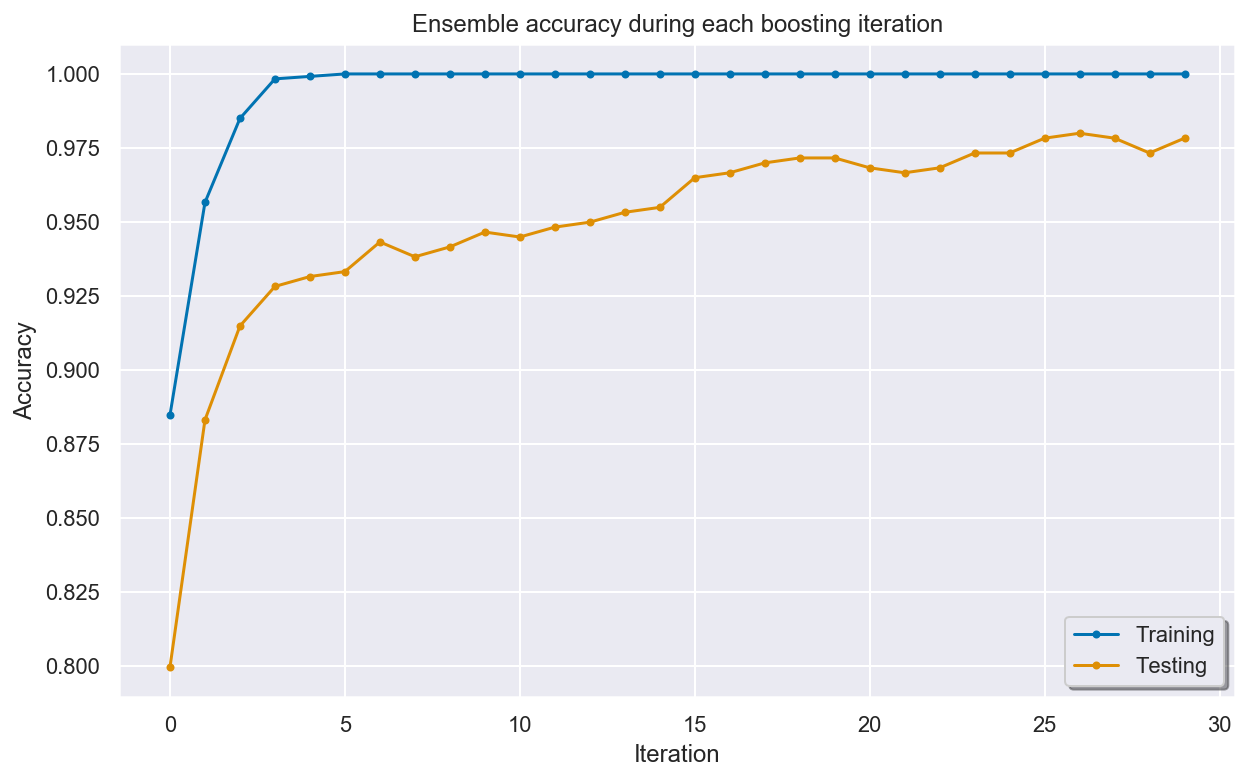

In [9]:
staged_accuracy_train = np.fromiter(lboost.staged_score(X_train, y_train),
                                    dtype=np.float64)
staged_accuracy_test = np.fromiter(lboost.staged_score(X_test, y_test),
                                   dtype=np.float64)

plt.figure(figsize=(10, 6))
plt.plot(staged_accuracy_train, label="Training", marker='.')
plt.plot(staged_accuracy_test, label="Testing", marker='.')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Ensemble accuracy during each boosting iteration")
plt.legend(loc="best", shadow=True, frameon=True)
plt.show()
plt.close()

## Exploring Misclassifications

We can use another PCA-reduced plot like the ones above to visualize prediction errors made on the test data.

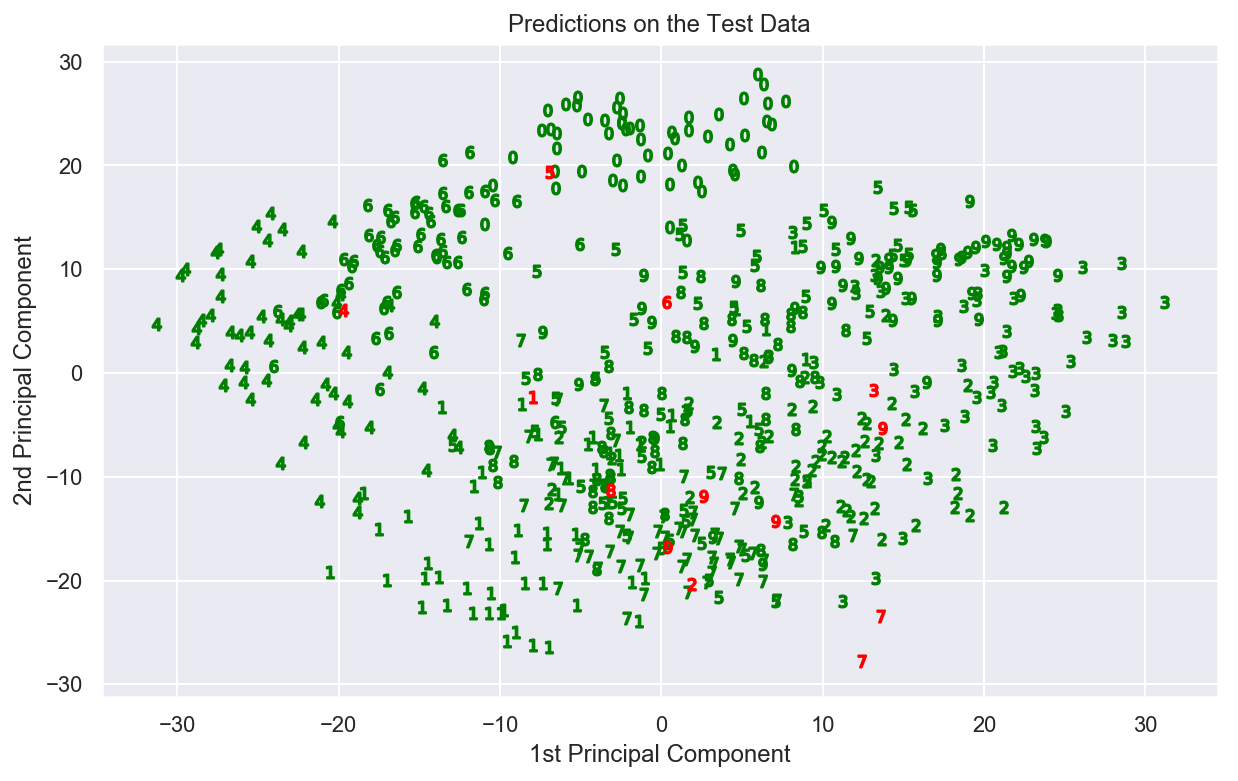

In [10]:
plt.figure(figsize=(10, 6))

for label_true, label_pred in product(range(10), repeat=2):
    marker = "$%d$" % label_pred
    color = "green" if label_pred == label_true else "red"
    zorder = 1 if label_pred == label_true else 2
    mask = (y_test == label_true) & (y_pred_test == label_pred)
    plt.scatter(X_test_2d[mask, 0], X_test_2d[mask, 1],
                color=color, marker=marker, zorder=zorder)
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Predictions on the Test Data")
plt.show()
plt.close()

Each point's number is the predicted value at that point. The color signifies the prediction accuracy (green means correct, red means incorrect)

Finlly, let's see some of the digits in the test set that were classified incorrectly.

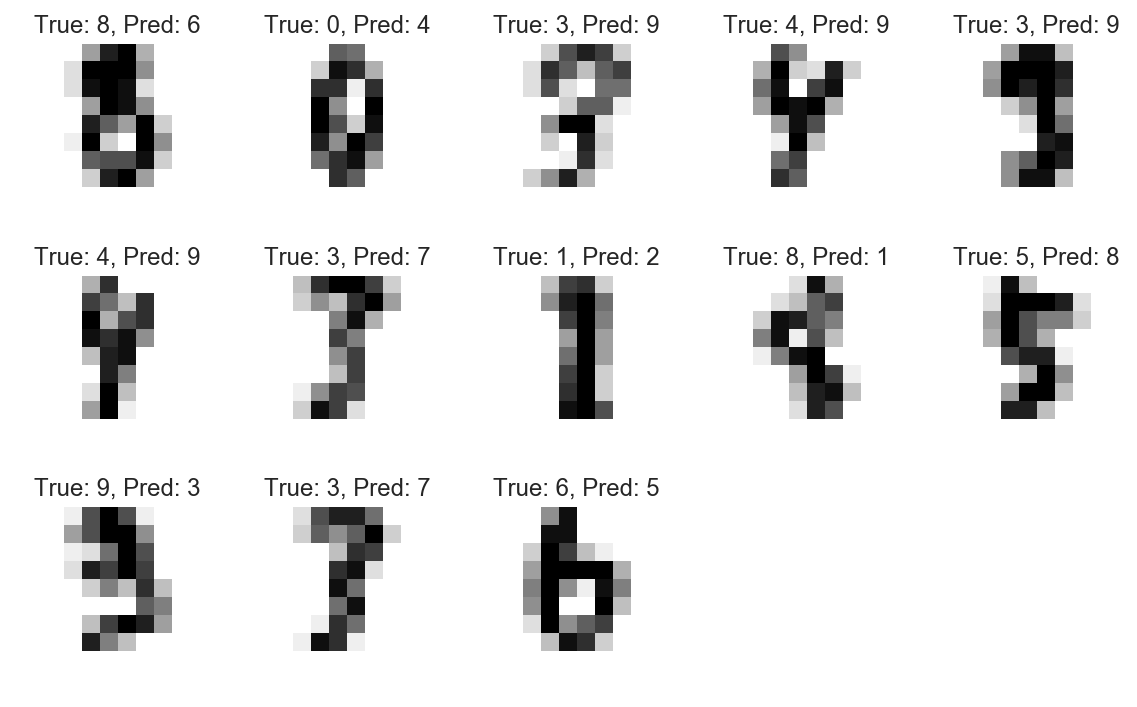

In [11]:
# Boolean mask of the misclassified test examples
incorrect = (y_test != y_pred_test)

nrows = 3
ncols = 5

_, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 5))

k = 0
for i, j in product(range(nrows), range(ncols)):
    # Find the index (k) of the next misclassified digit
    while k < len(y_test) and y_test[k] == y_pred_test[k]:
        k += 1
    
    if k < len(y_test):
        label_true = y_test[k]
        label_pred = y_pred_test[k]
    
        digit = X_test[k, :].reshape((8, 8))
        ax[i, j].imshow(digit, cmap="binary")
        ax[i, j].set_title("True: %d, Pred: %d" % (label_true, label_pred))
        
    ax[i, j].axis("off")
    k += 1

plt.tight_layout()
plt.show()
plt.close()